<a href="https://colab.research.google.com/github/vskorabelnikova/pz5_d4Z_Korabelnikova_Gundin/blob/main/LR8_Korabelnikova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

sales = pd.read_excel('Sales.xlsx')
territories = pd.read_excel('Territories.xlsx')
product = pd.read_excel('Product.xlsx')
customer = pd.read_excel('Customer.xlsx')

# Соединяем Sales и Territories по SalesTerritoryKey
sales_territories = pd.merge(sales, territories, on='SalesTerritoryKey', how='left')

# Соединяем с Product по ProductKey
sales_territories_product = pd.merge(sales_territories, product, on='ProductKey', how='left')

# Соединяем с Customer по CustomerKey
final_data = pd.merge(sales_territories_product, customer, on='CustomerKey', how='left')

# Удаляем дубликаты
final_data = final_data.drop_duplicates()

final_data.to_excel('Merged_Sales_Data.xlsx', index=False)

print("Итоговый файл готов")


Итоговый файл готов


1. **Обработка пропущенных значений:**
Вычислить процент пропущенных значений для каждой колонки.
Решение о заполнении пропущенных значений:
Если пропуски незначительны, рассмотреть их удаление.
Если пропуски значительны, рассмотреть заполнение средним/медианой/модой или использование методов импутации.

In [ ]:
import numpy as np
data = pd.read_excel('Merged_Sales_Data.xlsx')

missing_data = data.isnull().mean() * 100  # Процент пропусков в каждом столбце
missing_data_sorted = missing_data.sort_values(ascending=False)  # Сортировка по убыванию

print("Процент пропущенных значений в каждой колонке:")
print(missing_data_sorted)

#   - Если пропусков меньше 5%, удаляем строки с пропусками.
#   - Если пропусков больше 5%, заполняем пропуски (например, средним, медианой или модой).

threshold = 5  # Порог для удаления строк (в процентах)

# Удаляем строки с пропусками, если их менее 5%
data_cleaned = data.dropna(thresh=int((1 - threshold / 100) * len(data)))

# Заполнение пропусков в столбцах с более чем 5% пропусков
for column in data.columns:
    if missing_data[column] > threshold:
        # Если столбец числовой, заполняем медианой
        if data[column].dtype in [np.float64, np.int64]:
            median_value = data[column].median()
            data[column].fillna(median_value, inplace=True)
        # Если столбец категориальный, заполняем модой
        else:
            mode_value = data[column].mode()[0]
            data[column].fillna(mode_value, inplace=True)

print("\nОбработанные данные (первые 5 строк):")
print(data.head())

final_data.to_excel('Cleaned_Merged_Sales_Data.xlsx', index=False)

print("\nДанные с обработанными пропусками сохранены")


Процент пропущенных значений в каждой колонке:
Color                   47.160116
ProductKey               0.000000
TotalChildren            0.000000
ProductDescription       0.000000
StartDate                0.000000
FirstName                0.000000
LastName                 0.000000
FullName                 0.000000
BirthDate                0.000000
MaritalStatus            0.000000
Gender                   0.000000
YearlyIncome             0.000000
NumberChildrenAtHome     0.000000
ModelName                0.000000
Education                0.000000
Occupation               0.000000
HouseOwnerFlag           0.000000
NumberCarsOwned          0.000000
AddressLine1             0.000000
DateFirstPurchase        0.000000
CommuteDistance          0.000000
CustomerCity             0.000000
CustomerStateCode        0.000000
CustomerState            0.000000
Photo                    0.000000
ProductLine              0.000000
OrderDate                0.000000
DaysToManufacture        0.000000
S

<ipython-input-5-a567e532ff44>:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(mode_value, inplace=True)


   ProductKey  OrderDate   ShipDate  CustomerKey  PromotionKey  \
0         310 2014-01-01 2014-01-08        21768             1   
1         346 2014-01-01 2014-01-08        28389             1   
2         346 2014-01-01 2014-01-08        25863             1   
3         336 2014-01-01 2014-01-08        14501             1   
4         346 2014-01-01 2014-01-08        11003             1   

   SalesTerritoryKey SalesOrderNumber  SalesOrderLineNumber  OrderQuantity  \
0                  6          SO43697                     1              2   
1                  7          SO43698                     1              2   
2                  1          SO43699                     1              2   
3                  4          SO43700                     1              2   
4                  9          SO43701                     1              2   

   UnitPrice  ...    Occupation  HouseOwnerFlag  NumberCarsOwned  \
0  1789.1350  ...    Management               1                3  

2. ***Приведение типов данных:***
Для каждой колонки проверить соответствие типа данных её содержимому (например, числовой тип для TAX, категориальный для CHAS).
При необходимости, изменить тип данных колонок.

In [ ]:
data = pd.read_excel('Cleaned_Merged_Sales_Data.xlsx')
print("Типы данных в таблице:")
print(data.dtypes)

# Приводим числовые столбцы к типу float64
numeric_columns = ['TotalProductCost', 'TaxAmt', 'SalesAmount', 'UnitPrice', 'OrderQuantity']  # Пример числовых колонок
for col in numeric_columns:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')  # Преобразуем к числу, если не удастся, заменим на NaN

# Приведение категориальных столбцов к типу string
categorical_columns = ['Gender', 'MaritalStatus', 'CustomerCity', 'CustomerState', 'CustomerCountry']  # Пример категориальных колонок
for col in categorical_columns:
    if col in data.columns:
        data[col] = data[col].astype(str)

# Приведение столбцов с датами к типу datetime
date_columns = ['OrderDate', 'ShipDate']  # Пример колонок с датами
for col in date_columns:
    if col in data.columns:
        data[col] = pd.to_datetime(data[col], errors='coerce')  # Преобразуем к datetime, если ошибка, то NaT (Not a Time)

# Результат после типов данных
print("\nТипы данных после приведения:")
print(data.dtypes)

print("\nГотово!")


Типы данных в таблице:
ProductKey                       int64
OrderDate               datetime64[ns]
ShipDate                datetime64[ns]
CustomerKey                      int64
PromotionKey                     int64
SalesTerritoryKey                int64
SalesOrderNumber                object
SalesOrderLineNumber             int64
OrderQuantity                    int64
UnitPrice                      float64
TotalProductCost               float64
SalesAmount                    float64
TaxAmt                         float64
Region                          object
Country                         object
Group                           object
RegionImage                     object
Region Info                     object
ProductName                     object
SubCategory                     object
Category                        object
StandardCost                   float64
Color                           object
ListPrice                      float64
DaysToManufacture                int64
Pr

3. ***Проверка распределений переменных:***
Построение гистограмм: для каждой числовой переменной c помощью библиотеки Seaborn.
Построение ящиков с усами (boxplot): идентификация потенциальных выбросов с помощью библиотеки Seaborn.

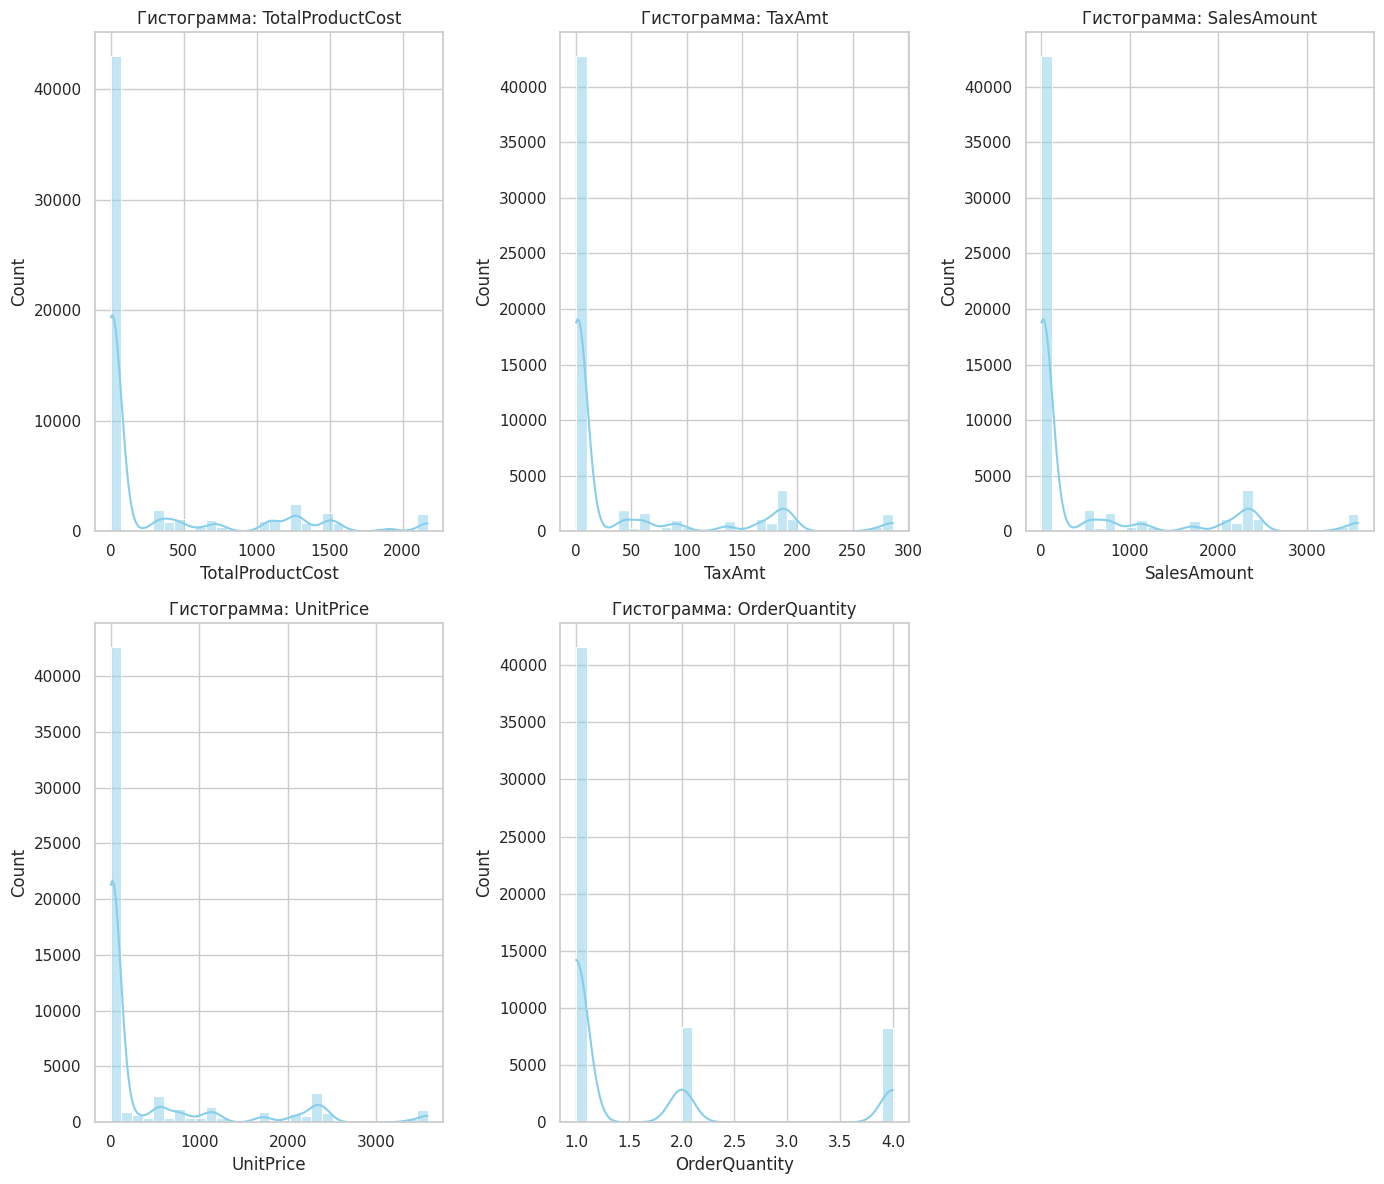

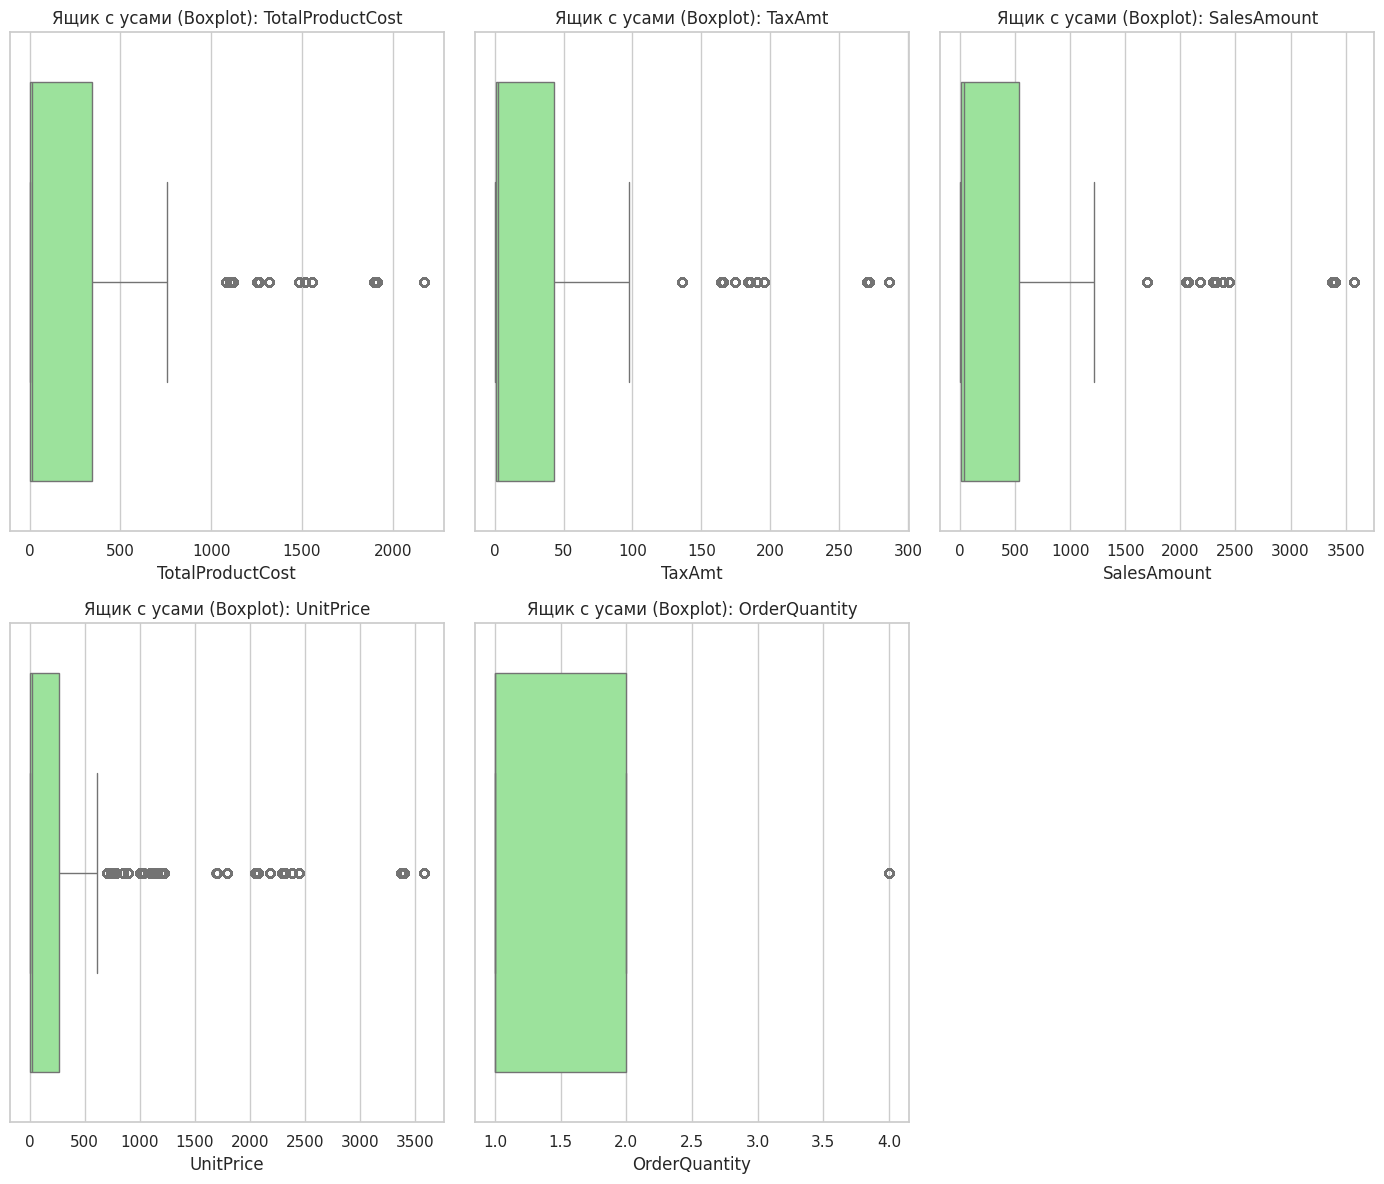

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = ['TotalProductCost', 'TaxAmt', 'SalesAmount', 'UnitPrice', 'OrderQuantity']

sns.set(style="whitegrid")

plt.figure(figsize=(14, 12))

# Построение гистограмм для числовых переменных
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)  # 2 строки и 3 столбца
    sns.histplot(data[column], kde=True, bins=30, color="skyblue")  # Гистограмма с KDE (ядерной плотностью)
    plt.title(f'Гистограмма: {column}')
    plt.tight_layout()

plt.show()

plt.figure(figsize=(14, 12))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)  # 2 строки и 3 столбца
    sns.boxplot(x=data[column], color="lightgreen")
    plt.title(f'Ящик с усами (Boxplot): {column}')
    plt.tight_layout()


plt.show()


4. **Обработка выбросов:**
Определить пороги для выбросов на основе статистических мер (например, IQR)
Решить, удалять ли выбросы или корректировать их значения.

In [ ]:
numeric_columns = ['TotalProductCost', 'TaxAmt', 'SalesAmount', 'UnitPrice', 'OrderQuantity']

def detect_and_handle_outliers(df, columns):
    cleaned_data = df.copy()

    for column in columns:
        if column in df.columns:
            # Вычисление первого и третьего квартилей (Q1, Q3)
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1

            # Вычисление порогов для выбросов
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Выводим пороги для каждого столбца
            print(f"\nДля столбца '{column}':")
            print(f"  Нижний порог (lower_bound): {lower_bound}")
            print(f"  Верхний порог (upper_bound): {upper_bound}")

            # Находим выбросы
            outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
            print(f"  Количество выбросов в столбце '{column}': {outliers.shape[0]}")

            cleaned_data = cleaned_data[(cleaned_data[column] >= lower_bound) & (cleaned_data[column] <= upper_bound)]

    return cleaned_data

cleaned_data = detect_and_handle_outliers(data, numeric_columns)

# Проверка изменений (первые 5 строк)
print("\nДанные после обработки выбросов (первые 5 строк):")
print(cleaned_data.head())

cleaned_data.to_excel('Cleaned_Merged_Sales_Data_No_Outliers.xlsx', index=False)

print("\nДанные без выбросов успешно сохранены в файл 'Cleaned_Merged_Sales_Data_No_Outliers.xlsx'!")



Для столбца 'TotalProductCost':
  Нижний порог (lower_bound): -507.06865000000005
  Верхний порог (upper_bound): 854.0805500000001
  Количество выбросов в столбце 'TotalProductCost': 9586

Для столбца 'TaxAmt':
  Нижний порог (lower_bound): -63.0008
  Верхний порог (upper_bound): 106.91919999999999
  Количество выбросов в столбце 'TaxAmt': 9586

Для столбца 'SalesAmount':
  Нижний порог (lower_bound): -787.51
  Верхний порог (upper_bound): 1336.49
  Количество выбросов в столбце 'SalesAmount': 9586

Для столбца 'UnitPrice':
  Нижний порог (lower_bound): -392.5175
  Верхний порог (upper_bound): 667.5025
  Количество выбросов в столбце 'UnitPrice': 11153

Для столбца 'OrderQuantity':
  Нижний порог (lower_bound): -0.5
  Верхний порог (upper_bound): 3.5
  Количество выбросов в столбце 'OrderQuantity': 8264

Данные после обработки выбросов (первые 5 строк):
     ProductKey  OrderDate   ShipDate  CustomerKey  PromotionKey  \
3           336 2014-01-01 2014-01-08        14501             1 

5. **Статистические выводы:**
Вычисление основных статистических метрик для каждой переменной (среднее, медиана, минимум, максимум)
Сделать письменные развернутые выводы в отдельной текстовой ячейке: сильно ли отличается среднее от медианы, как сильно друг от друга удалены минимум и максимум, рассчитать среднее отклонение и дисперсию

In [ ]:
numeric_columns = ['TotalProductCost', 'TaxAmt', 'SalesAmount', 'UnitPrice', 'OrderQuantity']

statistics = data[numeric_columns].describe().transpose()

statistics['median'] = data[numeric_columns].median()

print("Основные статистические метрики:")
print(statistics[['mean', 'median', 'min', 'max']])




Основные статистические метрики:
                        mean   median     min        max
TotalProductCost  296.539185  12.1924  0.8565  2171.2942
TaxAmt             40.293303   2.6080  0.1832   286.2616
SalesAmount       503.666270  32.6000  2.2900  3578.2700
UnitPrice         413.888218  24.4900  0.5725  3578.2700
OrderQuantity       1.569386   1.0000  1.0000     4.0000


Статистические выводы для столбца 'TotalProductCost':
  Среднее (296.54) значительно отличается от медианы (12.19). Это может указывать на выбросы.
  Разница между минимумом (0.8565) и максимумом (2171.2942) довольно велика (2170.4377). Это может указывать на широкий разброс данных.
  Стандартное отклонение (560.17) и дисперсия (313792.04) показывают степень разброса данных.

--------------------------------------------------

Статистические выводы для столбца 'TaxAmt':
  Среднее (40.29) значительно отличается от медианы (2.61). Это может указывать на выбросы.
  Разница между минимумом (0.1832) и максимумом (286.2616) довольно велика (286.0784). Это может указывать на широкий разброс данных.
  Стандартное отклонение (75.32) и дисперсия (5672.65) показывают степень разброса данных.

--------------------------------------------------

Статистические выводы для столбца 'SalesAmount':
  Среднее (503.67) значительно отличается от медианы (32.60). Это может указывать на выбросы.
  Разница между минимумом (2.29) и максимумом (3578.27) довольно велика (3575.98). Это может указывать на широкий разброс данных.
  Стандартное отклонение (941.46) и дисперсия (886352.24) показывают степень разброса данных.

--------------------------------------------------

Статистические выводы для столбца 'UnitPrice':
  Среднее (413.89) значительно отличается от медианы (24.49). Это может указывать на выбросы.
  Разница между минимумом (0.5725) и максимумом (3578.27) довольно велика (3577.6974999999998). Это может указывать на широкий разброс данных.
  Стандартное отклонение (833.05) и дисперсия (693977.20) показывают степень разброса данных.

--------------------------------------------------

Статистические выводы для столбца 'OrderQuantity':
  Среднее (1.57) значительно отличается от медианы (1.00). Это может указывать на выбросы.
  Разница между минимумом (1.0) и максимумом (4.0) довольно велика (3.0). Это может указывать на широкий разброс данных.
  Стандартное отклонение (1.05) и дисперсия (1.10) показывают степень разброса данных.

6. можно рассмотреть SalesAmount (Общая сумма продажи) и OrderQuantity (Количество заказанных товаров), чтобы изучить, как количество заказанных товаров влияет на общую сумму продажи.
Построить диаграмму рассеяния
Рассчитать коэффициент корреляции Пирсона.
Сделать письменный развернутый вывод в отдельной текстовой ячейке: влияет ли количество комнат и на стоимость жилья и почему? Логично ли это?



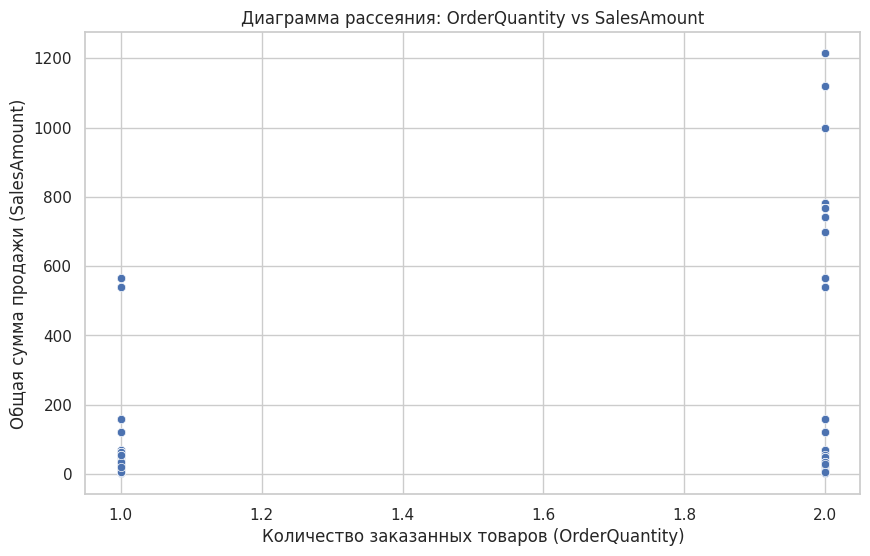

Коэффициент корреляции Пирсона: 0.17234987015081374


In [ ]:
from scipy.stats import pearsonr

file_path = 'Cleaned_Merged_Sales_Data_No_Outliers.xlsx'
data = pd.read_excel(file_path)

data = data.dropna(subset=['OrderQuantity', 'SalesAmount'])

# Построение диаграммы рассеяния
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['OrderQuantity'], y=data['SalesAmount'])
plt.title('Диаграмма рассеяния: OrderQuantity vs SalesAmount')
plt.xlabel('Количество заказанных товаров (OrderQuantity)')
plt.ylabel('Общая сумма продажи (SalesAmount)')
plt.show()

# Расчет коэффициента корреляции Пирсона
corr, _ = pearsonr(data['OrderQuantity'], data['SalesAmount'])
print(f'Коэффициент корреляции Пирсона: {corr}')


Коэффициент корреляции Пирсона, равный 0.1723, указывает на слабую положительную корреляцию между количеством заказанных товаров (OrderQuantity) и общей суммой продажи (SalesAmount). Это означает, что существует незначительная тенденция к тому, что с увеличением количества заказанных товаров увеличивается и сумма продажи, но эта связь не является сильной.

Диаграмма рассеяния: На диаграмме рассеяния точки расположены случайным образом, это подтверждает слабую или незначительную связь между количеством заказанных товаров и суммой продажи.

7. Существует ли связь между уровнем загрязнения (NOX) и расстоянием до центров занятости (DIS)?
Визуализировать связь с помощью диаграммы рассеяния.
Вычислить коэффициент корреляции.
Сделать письменный развернутый вывод в отдельной текстовой ячейке: влияет ли уровень загрязнения на расстояние до центров занятости? Логично ли это?

Количество строк после удаления пропусков: 39040
        YearlyIncome   SalesAmount
count   39040.000000  39040.000000
mean    58795.594262     56.676402
std     32884.644631    147.496755
min     10000.000000      2.290000
25%     30000.000000      4.990000
50%     60000.000000     21.980000
75%     80000.000000     34.990000
max    170000.000000   1214.850000


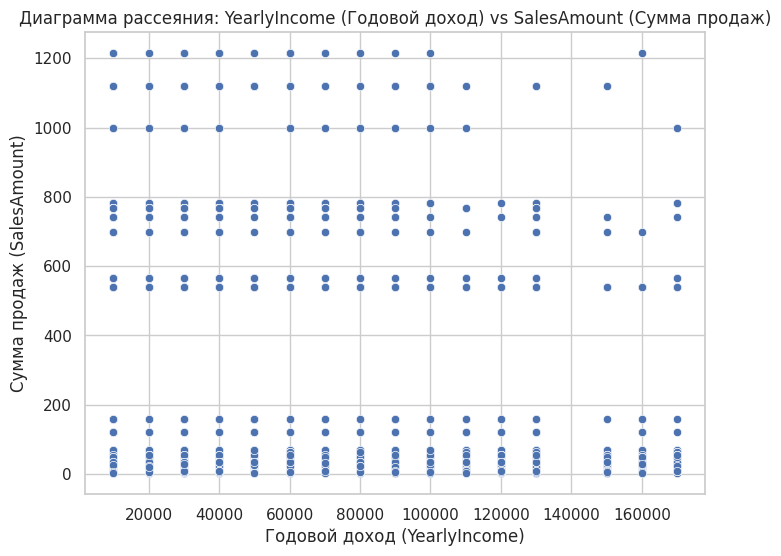

Коэффициент корреляции между годовым доходом и суммой продаж: -0.06


In [ ]:
data['YearlyIncome'] = pd.to_numeric(data['YearlyIncome'], errors='coerce')
data['SalesAmount'] = pd.to_numeric(data['SalesAmount'], errors='coerce')

data_clean = data.dropna(subset=['YearlyIncome', 'SalesAmount'])

# Диагностика: проверим количество строк после удаления пропусков
print(f'Количество строк после удаления пропусков: {len(data_clean)}')

# Описательная статистика для YearlyIncome и SalesAmount
print(data_clean[['YearlyIncome', 'SalesAmount']].describe())

# Построение диаграммы рассеяния
plt.figure(figsize=(8, 6))
sns.scatterplot(x='YearlyIncome', y='SalesAmount', data=data_clean)
plt.title('Диаграмма рассеяния: YearlyIncome (Годовой доход) vs SalesAmount (Сумма продаж)')
plt.xlabel('Годовой доход (YearlyIncome)')
plt.ylabel('Сумма продаж (SalesAmount)')
plt.show()

# Вычисляем коэффициент корреляции Пирсона между YearlyIncome и SalesAmount
correlation = data_clean['YearlyIncome'].corr(data_clean['SalesAmount'])
print(f'Коэффициент корреляции между годовым доходом и суммой продаж: {correlation:.2f}')



Анализ связи между годовым доходом (YearlyIncome) и суммой продаж (SalesAmount) показал очень слабую отрицательную корреляцию, равную -0.06. Это значение близко к нулю, что указывает на отсутствие существенной связи между этими переменными. Низкое значение коэффициента корреляции означает, что изменения в годовом доходе клиентов почти не влияют на их сумму покупок.

8. **Анализ связи между налоговой ставкой (TaxAmt) и суммой продаж (SalesAmount)**

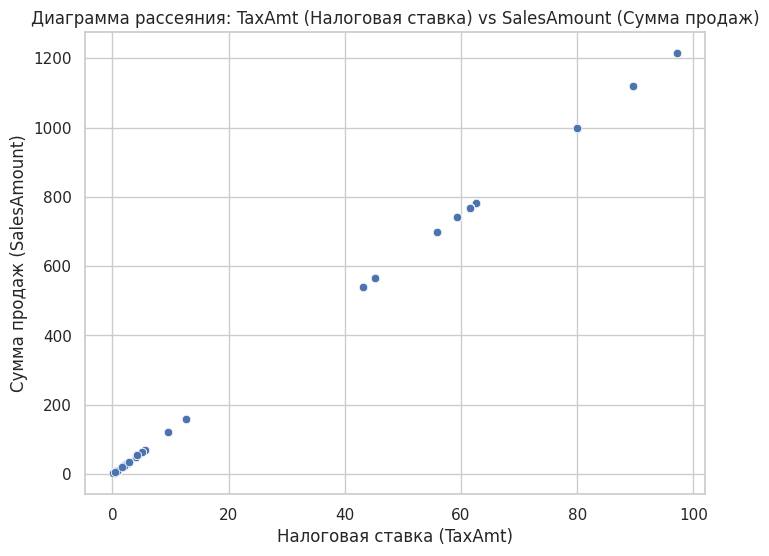

Коэффициент корреляции между налоговой ставкой и суммой продаж: 1.00


In [ ]:

data['TaxAmt'] = pd.to_numeric(data['TaxAmt'], errors='coerce')
data['SalesAmount'] = pd.to_numeric(data['SalesAmount'], errors='coerce')

data_clean = data.dropna(subset=['TaxAmt', 'SalesAmount'])

plt.figure(figsize=(8, 6))
sns.scatterplot(x='TaxAmt', y='SalesAmount', data=data_clean)
plt.title('Диаграмма рассеяния: TaxAmt (Налоговая ставка) vs SalesAmount (Сумма продаж)')
plt.xlabel('Налоговая ставка (TaxAmt)')
plt.ylabel('Сумма продаж (SalesAmount)')
plt.show()

correlation = data_clean['TaxAmt'].corr(data_clean['SalesAmount'])
print(f'Коэффициент корреляции между налоговой ставкой и суммой продаж: {correlation:.2f}')


Анализ связи между налоговой ставкой (TaxAmt) и суммой продаж (SalesAmount) показал, что коэффициент корреляции Пирсона между этими двумя переменными равен 1.00.

Коэффициент корреляции 1.00 указывает на идеальную положительную корреляцию, что означает, что изменения в налоговой ставке (TaxAmt) точно соответствуют изменениям в сумме продаж (SalesAmount). Другими словами, по мере увеличения или уменьшения налоговой ставки сумма продаж изменяется пропорционально в том же направлении.

Логичность вывода: Это может указывать на то, что в вашем наборе данных для этих переменных существует прямое, линейное и совершенно согласованное изменение.

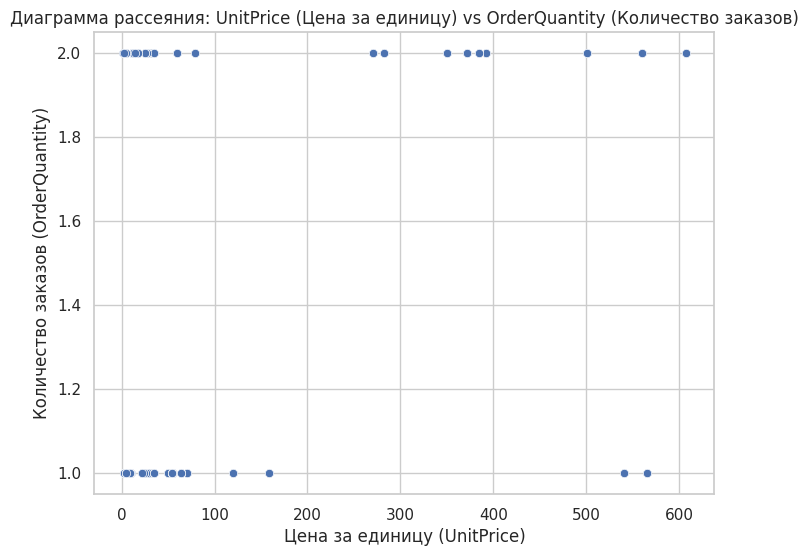

Коэффициент корреляции между ценой за единицу и количеством заказов: 0.04


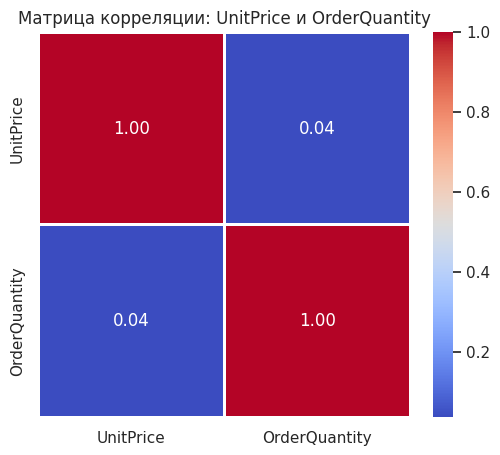

In [ ]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x='UnitPrice', y='OrderQuantity', data=data_clean)
plt.title('Диаграмма рассеяния: UnitPrice (Цена за единицу) vs OrderQuantity (Количество заказов)')
plt.xlabel('Цена за единицу (UnitPrice)')
plt.ylabel('Количество заказов (OrderQuantity)')
plt.show()

correlation = data_clean['UnitPrice'].corr(data_clean['OrderQuantity'])
print(f'Коэффициент корреляции между ценой за единицу и количеством заказов: {correlation:.2f}')

correlation_matrix = data_clean[['UnitPrice', 'OrderQuantity']].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Матрица корреляции: UnitPrice и OrderQuantity')
plt.show()


Обогащение датасета


In [ ]:
# Добавляем новый столбец для общей стоимости заказа
data['TotalOrderCost'] = data['UnitPrice'] * data['OrderQuantity']

# Средняя цена по категориям товаров
category_avg_price = data.groupby('Category')['UnitPrice'].mean()
data = data.merge(category_avg_price, on='Category', suffixes=('', '_AvgCategoryPrice'))


Добавляем столбец с One Hot Encoding. В наборе данных есть много категориальных переменных, таких как Region, Country, ProductName, Category, Gender, Education.

In [ ]:
# Применение One-Hot Encoding для столбца "Region"
data_encoded = pd.get_dummies(data, columns=['Region'], drop_first=True)
# Применение One-Hot Encoding для столбца "Category"
data_encoded = pd.get_dummies(data, columns=['Category'], drop_first=True)


После выполнения этой операции для каждой уникальной категории в столбце Region будет создан отдельный бинарный столбец. Например, если есть регионы "North", "South", и "West", будут созданы столбцы Region_North, Region_South, Region_West, и каждый будет содержать 0 или 1.

Редкая категория

Предположим, что в столбце Country есть много стран, но несколько из них встречаются очень редко. Мы можем объединить их в категорию Other.

In [ ]:
# Проверяем частоту стран
country_counts = data['Country'].value_counts()

# Определяем порог, например, если страна встречается менее 5 раз, заменяем на 'Other'
rare_countries = country_counts[country_counts < 5].index

# Заменяем редкие страны на 'Other'
data['Country'] = data['Country'].replace(rare_countries, 'Other')


In [ ]:
data_encoded.head()

,ProductKey,OrderDate,ShipDate,CustomerKey,PromotionKey,SalesTerritoryKey,SalesOrderNumber,SalesOrderLineNumber,OrderQuantity,UnitPrice,...,DateFirstPurchase,CommuteDistance,CustomerCity,CustomerStateCode,CustomerState,CustomerCountry,TotalOrderCost,UnitPrice_AvgCategoryPrice,Category_Bikes,Category_Clothing
0,336,2014-01-01,2014-01-08,14501,1,4,SO43700,1,2,349.5491,...,2005-07-01,1-2 Miles,Beverly Hills,CA,California,United States,699.0982,486.209731,True,False
1,332,2014-01-08,2014-01-15,14560,1,4,SO43726,1,2,349.5491,...,2005-07-08,2-5 Miles,Bellflower,CA,California,United States,699.0982,486.209731,True,False
2,332,2014-01-15,2014-01-22,19941,1,10,SO43756,1,2,349.5491,...,2005-07-15,0-1 Miles,London,ENG,England,United Kingdom,699.0982,486.209731,True,False
3,334,2014-02-05,2014-02-12,20048,1,10,SO43935,1,2,349.5491,...,2005-08-05,1-2 Miles,Birmingham,ENG,England,United Kingdom,699.0982,486.209731,True,False
4,336,2014-02-05,2014-02-12,25294,1,9,SO43940,1,2,349.5491,...,2005-08-05,0-1 Miles,North Sydney,NSW,New South Wales,Australia,699.0982,486.209731,True,False


In [ ]:
import pandas as pd

output_file_path = 'Cleaned_Merged_Sales_Data_No_Outliers.xlsx'


data_encoded.to_excel(output_file_path, index=False)

print(f"Файл успешно сохранен по пути: {output_file_path}")


Файл успешно сохранен по пути: Cleaned_Merged_Sales_Data_No_Outliers.xlsx
